# Development of the Metrics for Data Analysis

In [93]:
import os
os.chdir('../saliency_model/')

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from metrics import *
from utils import center_bias

Prerequisites...

In [94]:
# Load example images
path = 'C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco\\fixation_maps\\COCO_val2014_000000000133.png'
fix_map = mpimg.imread(path)

path = 'C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco\\predictions\\aim\\COCO_val2014_000000000133.jpg'
sal_map = mpimg.imread(path)

path = 'C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco\\fixations\\COCO_val2014_000000000133.mat'
fixations = create_binary_fix(path)

baseline = center_bias(lambda x, y: gaussian2D(x, y, 50), np.shape(fix_binary))

[258  74  68  66  37  30  20   9   1   1   4   9  13  16  18  22  24  26
  27  30  31  34  34  35  36  37  38  38  38  38  39  40  41  42  42  43
  44  45  46  46  46  47  48  48  50  50  50  51  52  53  54  54  55  56
  58  59  60  62  63  64  65  66  66  67  67  68  69  70  70  71  73  75
  77  80  83  84  86  88  90  92  94  94  95  96  96  97  97  97  97  97
  97  97  97  97  97  96  95  94  93  92  92  92  94  98 101 102 105 106
 108 110 114 117 121 124 130 134 138 142 143 146 146 148 149 149 150 150
 150 150 150 150 150 150 150 148 146 146 142 138 135 131 129 126 122 118
 114 110 106 103  99  96  93  89  86  83  81  80  79  78  78  78  78  77
  77  77  77  77  77  78  82  84  86  90  94  96 102 104 107 112 116 118
 122 128 133 138 142 146 149 152 154 157 159 160 163 166 170 173 175 178
 183 186 190 193 196 198 200 202 203 206 209 211 214 219 222 226 230 233
 237 239 242 244 249 250 256 260 264 267 270 273 276 280 283 288 293 299
 305 312 317 324 332 338 345 352 358 363 370 375 38

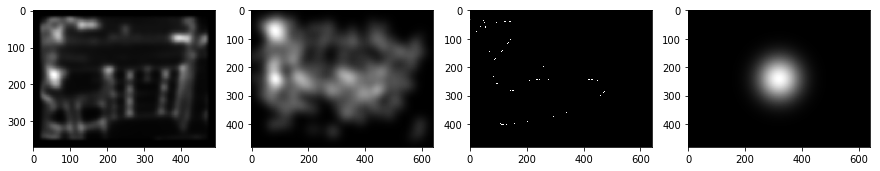

In [96]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[1].imshow(fix_map)
ax[0].imshow(sal_map)
ax[2].imshow(fixations)
ax[3].imshow(baseline);

In [4]:
import scipy.io as sio

In [40]:
fix = sio.loadmat('C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco\\fixations\\COCO_val2014_000000000164.mat')

In [42]:
fix_gaze = fix['gaze'][0][0][0]
x = fix_gaze[:,0]   # width
y = fix_gaze[:,1]   # height

499

In [43]:
height = fix['resolution'][0][0]
width = fix['resolution'][0][1]
print(width, height)

640 480


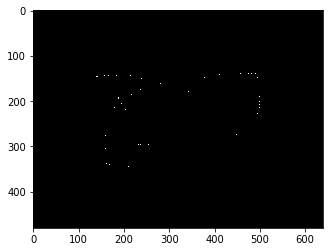

In [55]:
#fix_binary = np.zeros((height, width))
plt.imshow(fix_binary)

In [54]:
for xi,yi in zip(x,y):
    fix_binary[xi, yi] = 1

In [85]:
def create_binary_fix(path):
    fix = sio.loadmat(path)
    
    fix_gaze = fix['gaze'][0][0][0]
    x = fix_gaze[:,0].astype(int)   # width
    y = fix_gaze[:,1].astype(int)   # height
    
    height = fix['resolution'][0][0]
    width = fix['resolution'][0][1]
    
    fix_binary = np.zeros((height, width))
    
    for xi,yi in zip(x,y):
        fix_binary[yi, xi] = 1
    
    return fix_binary

In [87]:
path = 'C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco\\fixations\\COCO_val2014_000000000692.mat'
fixations = create_binary_fix(path)

[338 295 295 295 296 297 312 318 322 324 328 330 335 337 339 342 343 344
 345 346 347 347 347 347 347 345 342 341 338 336 333 330 328 326 324 323
 321 319 317 316 315 314 313 312 312 311 310 309 309 308 308 307 307 307
 307 307 307 307 308 309 310 312 313 315 315 317 318 319 320 321 322 323
 323 324 324 324 324 325 325 325 326 326 326 326 327 328 331 333 338 342
 347 353 361 367 376 384 391 400 410 416 422 426 430 433 436 439 441 442
 443 445 447 448 450 452 453 455 456 457 458 459 460 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 478 479 480 480
 481 482 483 483 484 485 486 487 488 488 489 489 489 489 489 487 486 483
 481 478 476 472 468 465 461 457 454 451 449 445 445 442 441 439 439 438
 438 437 437 437 437 437 437 437 438 438 439 440 440 441 442 442 442 443
 443 444 444 444 444 444 444 444 444 443 443 443 443 443 443 443 442 442
 442 442 442 442 442 441 440 438 437 432 429 423 417 410 403 396 388 379
 369 363 356 351 348 345 344 342 340 339 338 337 33

## (1) Area Under the ROC Curve (AUC)

The ROC curve shows the performance of classifying pixels as fixated or non-fixated with different thresholds by looking at the true positive and false positive rate. 

Based on the implementation of Judd et al. 

To compare them, the images need to have the same size, so we resize the saliency map to the fixation map (according to MIT benchmark calculation).  Don't (down-)scale the fixation map to the saliency map, since the fixation map is binary here!

**Function documentation**:

Get all values of the saliency map that correctly predicted some fixation (disregarding the question how strong that fixation / saliency value is). With that, we also get the different thresholds for saliencies predicting fixation. We sort those and iterate over those thresholds, finding out how good they classify each the saliency of each pixel.

Loop over the thresholds, for each threshold compute:

$TP = \frac{\text{# correctly predicted fixation with this threshold}}{\text{# fixated pixels}}$

$FP = \frac{\text{# incorrectly predicted fixation with this threshold}}{\text{# not fixated pixels}}$

In [5]:
# create binary fixation
fix_binary = fix_map > 0

auc_score, tp, fp, thresholds = auc_judd_score(sal_map, fix_binary)

0.5411632631634629


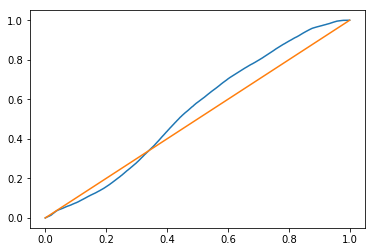

In [6]:
print(auc_score)

plt.plot(fp, tp)
plt.plot(np.arange(0, 1, 1/len(fp)), np.arange(0,1, 1/len(fp)));

## (2) NSS (Normalized Scanpath Saliency)

In [5]:
nss = compute_nss(sal_map, fix_binary)
print(nss)

0.015354130059723631


## (3) Similarity

Distribution-based metric, so the input is the continuous fixation map

In [5]:
sim_score = compute_similarity(sal_map, fix_map)
print(sim_score)

0.3312386880165913


## (4) Information Gain
Location-based metric, input is a binary fixation map. Computes the information gain of one model over a baseline (can also be another model) for the fixated pixels.

The saliency input maps have to be probability distributions, so we shift them to values > 0 and normalize them.

In [5]:
# create binary fixation
fix_binary = fix_map > 0

ig = compute_information_gain(sal_map, fix_binary)
print(ig)

-0.2764578470394656


---------------------------------------

In [4]:
nss, sim, info_gain, auc = compute_all_metrics(sal_map=sal_map, fix_map=fix_map, skip_auc = True)